# 사용자 정의 모델과 훈련 알고리즘

사용자 정의 손실 함수

- 평균 제곱 오차: 큰 오차에 너무 과한 벌칙을 가하기 때문에 정확하지 않은 모델 야기
- 후버 손실: 평균 제곱 오차의 한계를 해결, 일정 범위 안에 있으면 오차를 제곱하고 밖에 있으면 오차의 절댓값을 구함

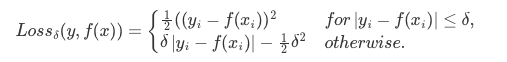

In [ ]:
import torch
import torch.nn.functional as F

curr_q = torch.FloatTensor([10,11,12,10,9])
target_q = torch.FloatTensor([12,8,10,13,11])
loss = F.smooth_l1_loss(curr_q, target_q)


모델 저장하고 로드하기

- 추론을 위해 모델의 학습된 매개변수만 저장하는 방법
- 전체 모델 저장 및 불러오기
- 추론 / 학습 재개를 위해 일반 체크포인트 저장하기 & 불러오기

In [ ]:
#1

torch.save(model.state_dict(), PATH)
model = TheModelClass(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.eval()

#2
torch.save(model, PATH)
model = torch.load(PATH)
model.eval()

#3
torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
            ...
            }, PATH)

checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

model.eval()
model.train()

# 새 섹션